In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar 

In [4]:
Weather_data = "/Users/hasnainashraf/Desktop/seattle-weather.csv"
df = pd.read_csv(Weather_data) 

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (1461, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [7]:
"""Convert to Datetime"""

df['date'] = pd.to_datetime(df['date'])

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek 

In [9]:
def get_season(month):
    """Determine season based on month."""
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [10]:
df['season'] = df['date'].dt.month.apply(get_season)

In [11]:
"""Specify Numerical variables"""

numerical_df = df[['precipitation', 'temp_max', 'temp_min', 'wind']] 

In [12]:
print("\nBasic Statistics:")
print(df.describe())
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nWeather Types Distribution:")
print(df['weather'].value_counts())


Basic Statistics:
                      date  precipitation     temp_max     temp_min  \
count                 1461    1461.000000  1461.000000  1461.000000   
mean   2013-12-31 00:00:00       3.029432    16.439083     8.234771   
min    2012-01-01 00:00:00       0.000000    -1.600000    -7.100000   
25%    2012-12-31 00:00:00       0.000000    10.600000     4.400000   
50%    2013-12-31 00:00:00       0.000000    15.600000     8.300000   
75%    2014-12-31 00:00:00       2.800000    22.200000    12.200000   
max    2015-12-31 00:00:00      55.900000    35.600000    18.300000   
std                    NaN       6.680194     7.349758     5.023004   

              wind         year        month          day    dayofweek  
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000  
mean      3.241136  2013.498973     6.522930    15.729637     2.997947  
min       0.400000  2012.000000     1.000000     1.000000     0.000000  
25%       2.200000  2012.000000     4.000000     

Text(0, 0.5, 'Temperature (°C)')

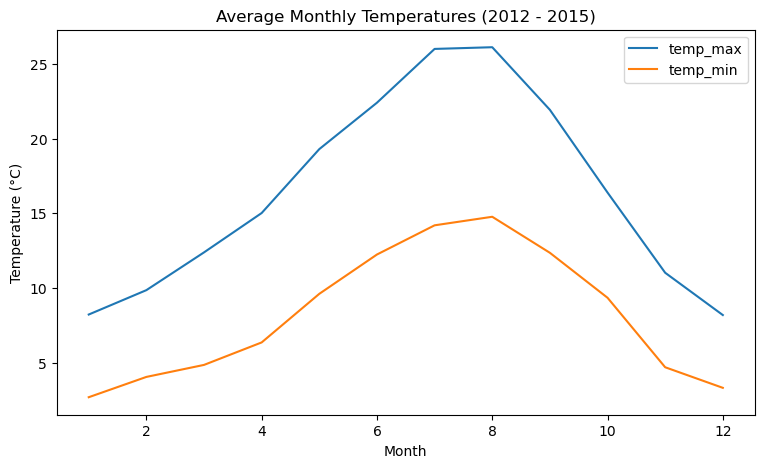

In [13]:
monthly_temps = df.groupby('month')[['temp_max', 'temp_min']].mean()
monthly_temps.plot(figsize=(9, 5)) 
plt.title('Average Monthly Temperatures (2012 - 2015)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

In [46]:
monthly_temps = df.groupby('month')[['temp_max', 'temp_min']].mean()

Text(0, 0.5, 'Precipitation (mm)')

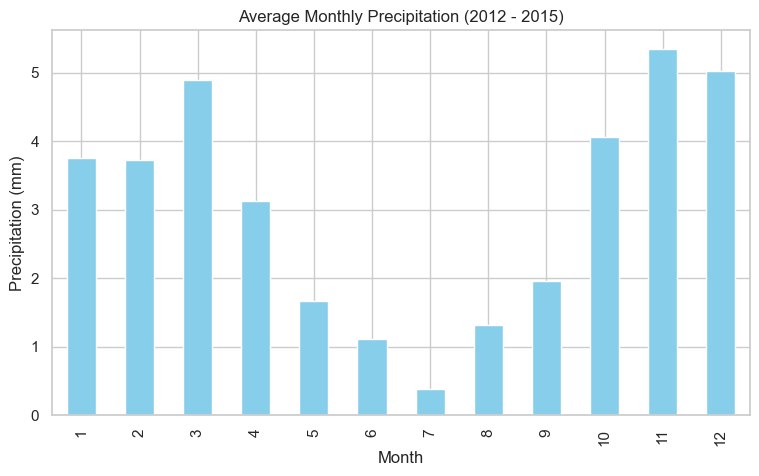

In [69]:
"""plt.subplot(2,2,figsize=(9,5))"""
monthly_precip = df.groupby('month')['precipitation'].mean()
monthly_precip.plot(kind='bar', color='skyblue', figsize=(9, 5))
plt.title('Average Monthly Precipitation (2012 - 2015)')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)') 

NOTE: Data spans three years. Monthly variation in bar height may reflect the number of days in each month.


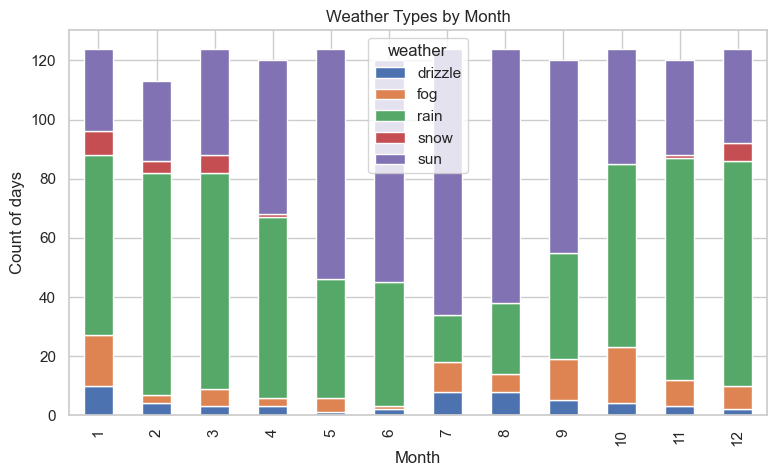

In [74]:
weather_by_month = pd.crosstab(df['month'], df['weather'])
weather_by_month.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Weather Types by Month')
plt.xlabel('Month')
plt.ylabel('Count of days') 

print("NOTE: Data spans three years. Monthly variation in bar height may reflect the number of days in each month.")

Text(0, 0.5, 'Wind Speed')

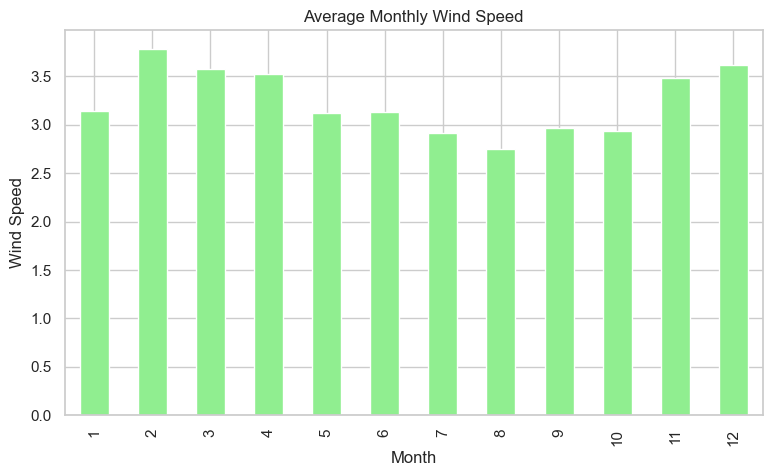

In [78]:
monthly_wind = df.groupby('month')['wind'].mean()
monthly_wind.plot(kind='bar', color='lightgreen', figsize=(9, 5))
plt.title('Average Monthly Wind Speed')
plt.xlabel('Month')
plt.ylabel('Wind Speed')

In [18]:
 monthly_temps2 = df.groupby('year')[['temp_max', 'temp_min']].mean()

In [19]:
monthly_temps2 

,temp_max,temp_min
year,,
2012,15.276776,7.289617
2013,16.058904,8.153973
2014,16.995890,8.662466
2015,17.427945,8.835616


In [86]:
numerical_df = df[['precipitation', 'temp_max', 'temp_min', 'wind']] 

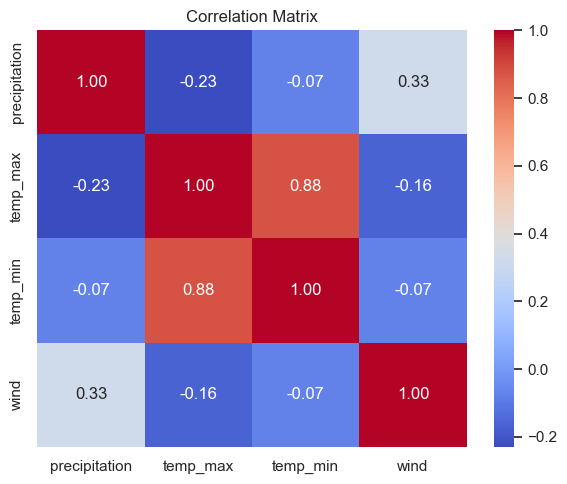

In [92]:
plt.figure(figsize=(6, 5))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png') 

<Figure size 1200x1000 with 0 Axes>

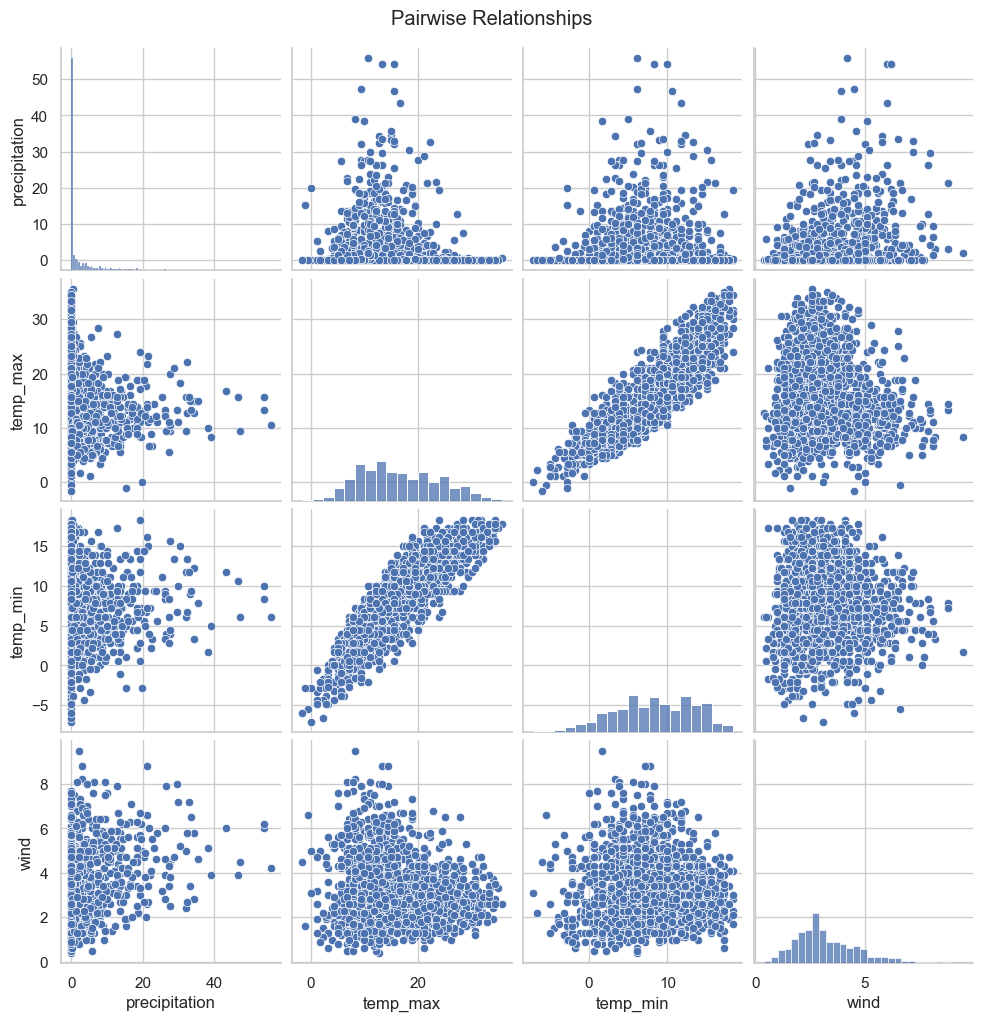

In [94]:
plt.figure(figsize=(12, 10))
sns.pairplot(numerical_df)
plt.suptitle('Pairwise Relationships', y=1.02) 